In [26]:
### imports
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn import tree


In [2]:
df = pd.read_csv('data_2020-02-24.csv')

## Making predictive model for determining goals

In [4]:
y = df['shot_outcome'].str.contains('Goal|On Net')
X = df.drop(columns=['shot_outcome'])
dropped_columns = ['game_date']
X = X.drop(columns=dropped_columns)

In [5]:
# utilize pandas get dummies to turn textual features into numerical binary features
dummies_columns = ['team','passer','shooter', 'shot_type', 'game_state', 'home_team', 'away_team']
X_dummies = pd.get_dummies(X, prefix_sep='-', columns = dummies_columns)

In [70]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.33, random_state=13)
rfc = RandomForestClassifier(random_state=12, max_depth =4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=12)

In [71]:
# perform recursive feature estimation to determine the most important features
rfe = RFE(estimator=rfc, n_features_to_select=25, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(max_depth=4, random_state=12),
    n_features_to_select=25)

In [72]:
rfe.predict(X_test)[0:10]

array([False,  True,  True,  True, False, False, False, False, False,
        True])

In [73]:
confusion_matrix(y_test, rfe.predict(X_test))

array([[112,  75],
       [ 58,  91]])

In [74]:
precision_score(y_test, rfe.predict(X_test))

0.5481927710843374

In [75]:
X_train

,period,game_seconds,time_since_pass,home_team_goals,away_team_goals,pass_x,pass_y,rec_x,rec_y,shot_x,...,home_team-Connecticut Whale,home_team-Metropolitan Riveters,home_team-Minnesota Whitecaps,home_team-Toronto Six,away_team-Boston Pride,away_team-Buffalo Beauts,away_team-Connecticut Whale,away_team-Metropolitan Riveters,away_team-Minnesota Whitecaps,away_team-Toronto Six
868,3,2422,0,3,0,186,64,181,49,181,...,0,0,0,0,0,1,0,0,0,0
485,2,1378,3,0,0,138,46,162,67,179,...,0,1,0,0,0,0,0,0,1,0
317,3,3435,1,3,4,157,35,169,53,174,...,1,0,0,0,0,0,0,1,0,0
69,1,200,0,0,0,168,81,132,69,132,...,0,0,0,0,0,0,1,0,0,0
29,2,1551,1,1,1,152,28,180,23,180,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,3,3170,4,1,1,54,9,109,27,138,...,0,0,0,0,1,0,0,0,0,0
528,3,3075,1,0,0,146,4,139,3,159,...,0,1,0,0,0,0,0,0,1,0
74,1,789,1,0,0,190,35,194,39,187,...,0,0,0,0,0,0,1,0,0,0
176,3,2697,2,2,0,157,80,157,50,150,...,0,1,0,0,0,0,0,0,0,1


In [76]:
y_train.value_counts()

False    357
True     323
Name: shot_outcome, dtype: int64

In [77]:
df_feature_importance = pd.DataFrame(rfc.feature_importances_, index = X_test.columns )

In [50]:
df_feature_importance.to_csv('df_feature_importances.csv')

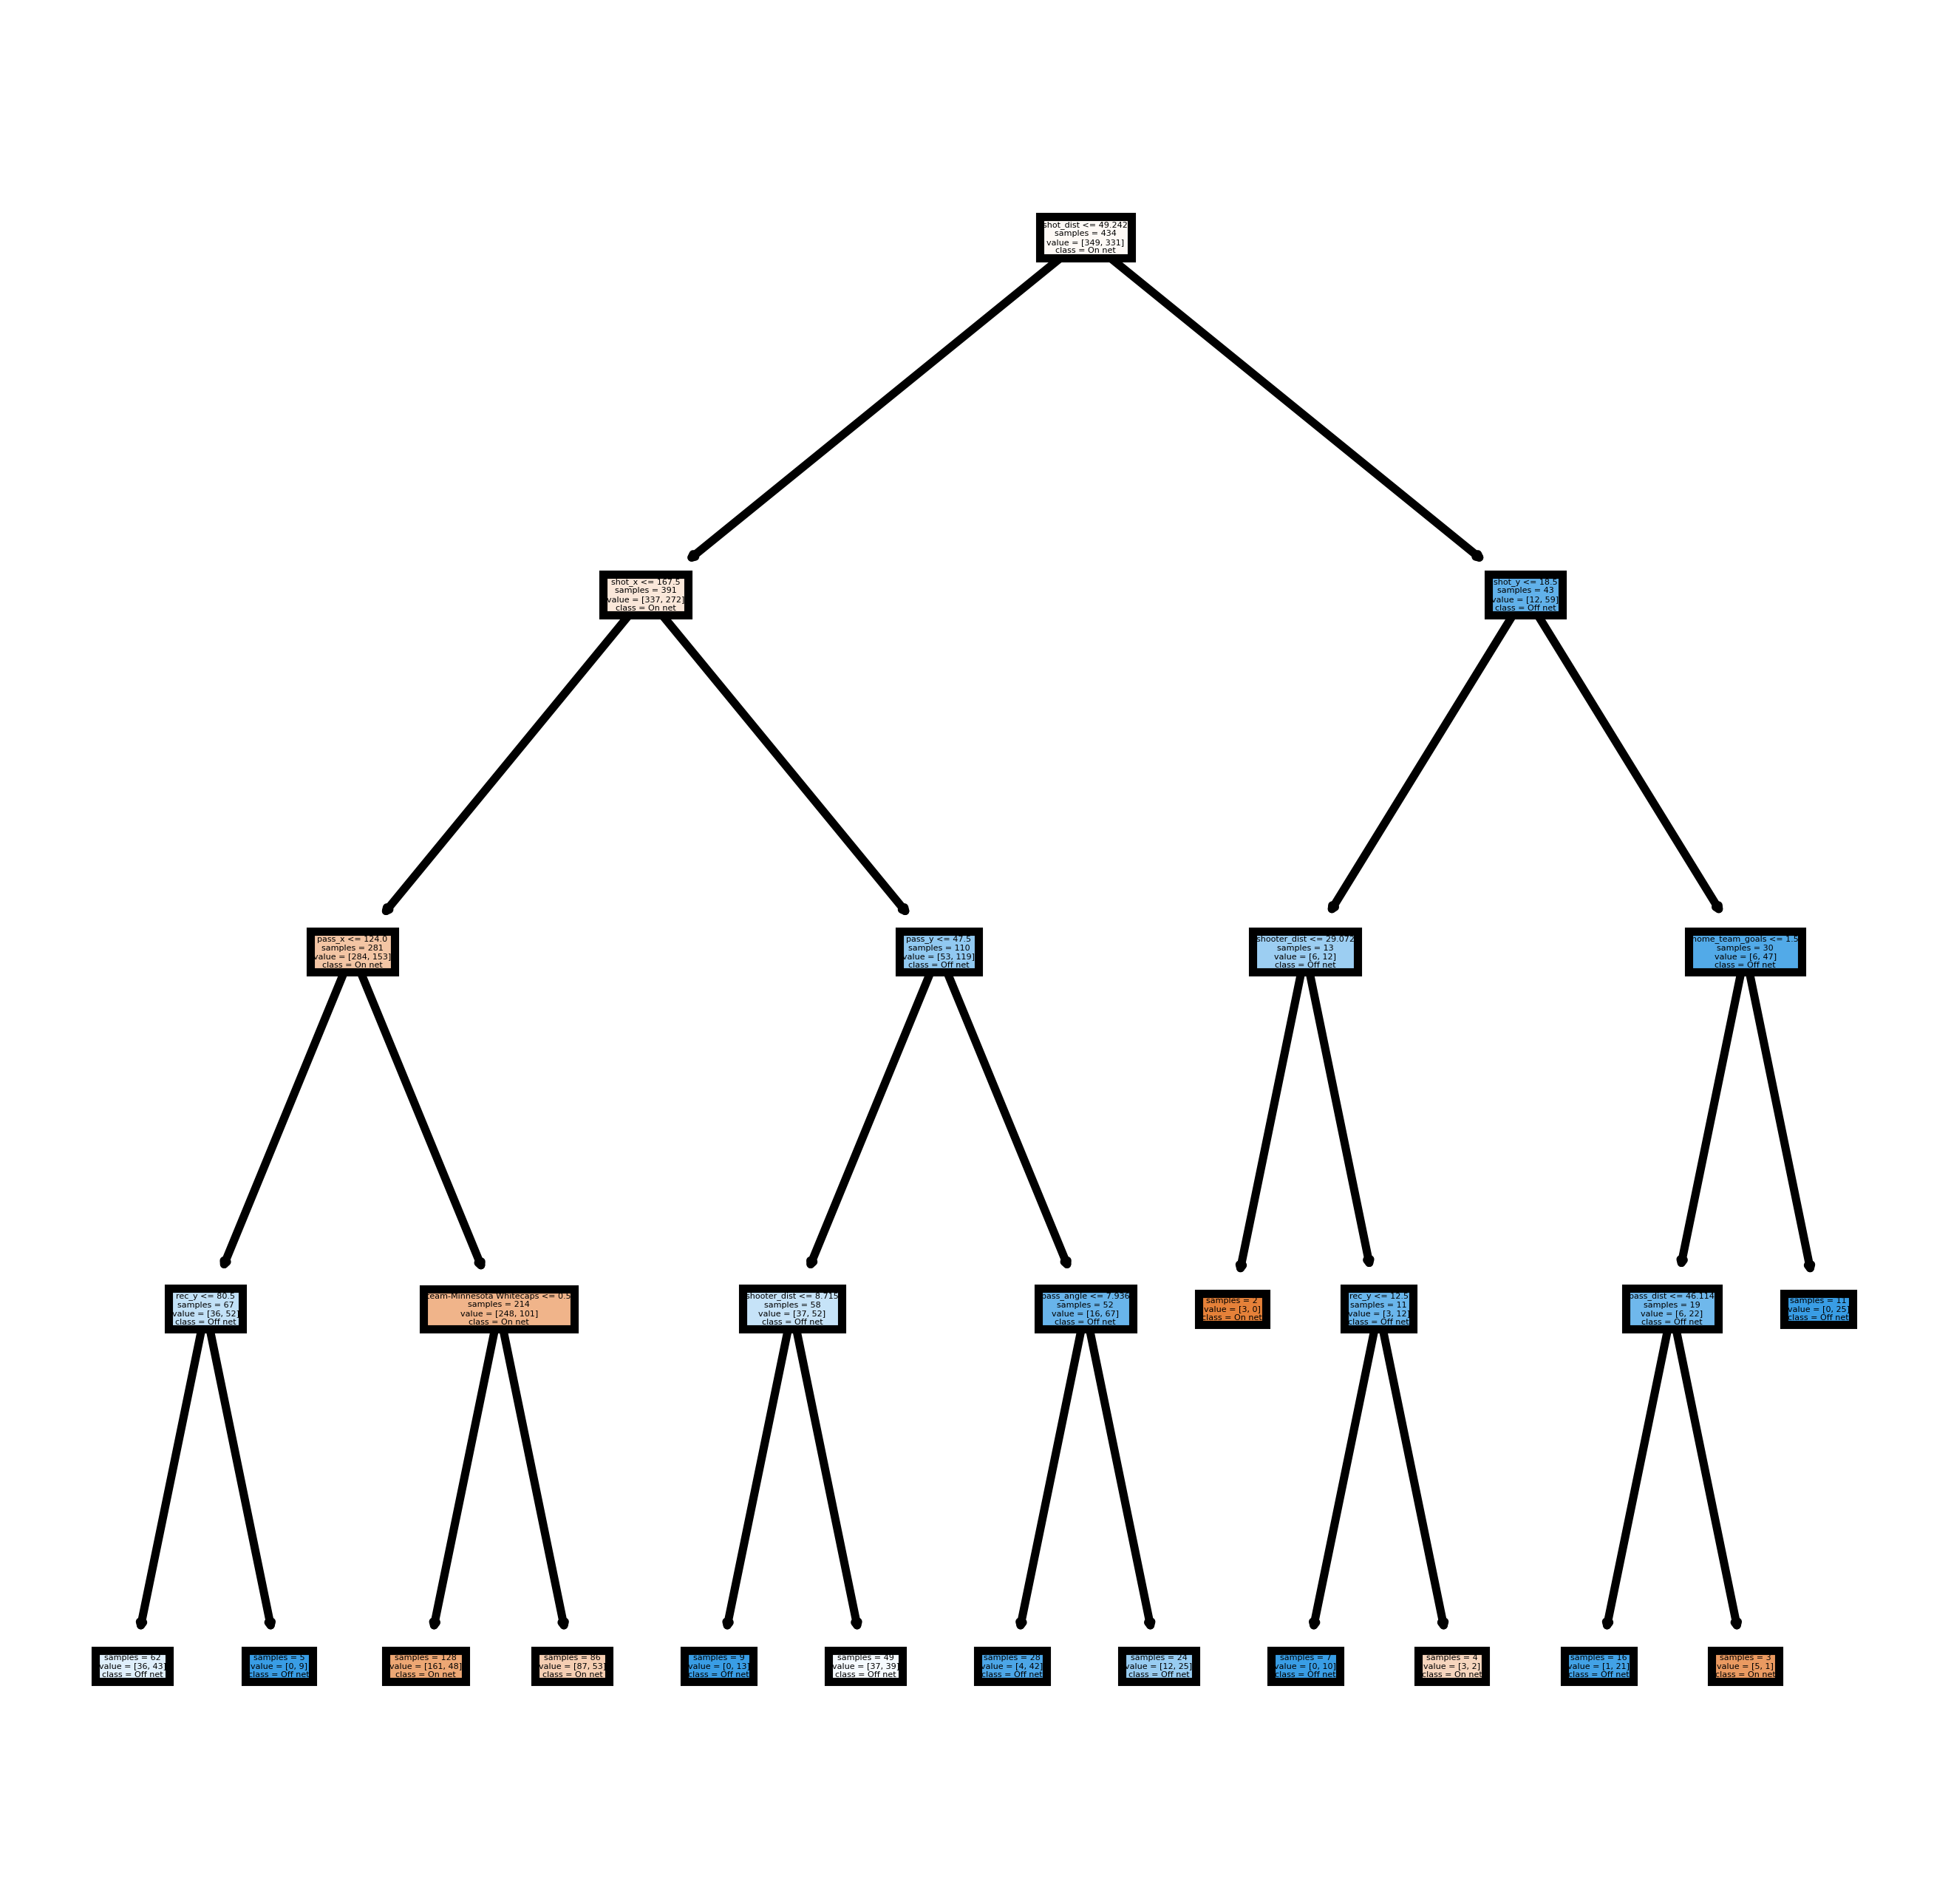

In [79]:
fn= feature_names
cn= class_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rfe.estimator_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True,
               impurity = False
              );
fig.savefig('rf_individualtree.png')

In [67]:
class_names = ['On net', 'Off net']

In [34]:
feature_names = X_train.columns

In [31]:
rfc.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=662124363),
 DecisionTreeClassifier(max_features='auto', random_state=1916507803),
 DecisionTreeClassifier(max_features='auto', random_state=1031005574),
 DecisionTreeClassifier(max_features='auto', random_state=1603685629),
 DecisionTreeClassifier(max_features='auto', random_state=1130929393),
 DecisionTreeClassifier(max_features='auto', random_state=371232386),
 DecisionTreeClassifier(max_features='auto', random_state=144909571),
 DecisionTreeClassifier(max_features='auto', random_state=960362435),
 DecisionTreeClassifier(max_features='auto', random_state=62598988),
 DecisionTreeClassifier(max_features='auto', random_state=1505292720),
 DecisionTreeClassifier(max_features='auto', random_state=1798504726),
 DecisionTreeClassifier(max_features='auto', random_state=145874993),
 DecisionTreeClassifier(max_features='auto', random_state=1721057204),
 DecisionTreeClassifier(max_features='auto', random_state=1268891525),
 DecisionTree

In [38]:
rfc.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=662124363)